# Take-Home Exam 5: Decision Trees

*In this take-home exam, you are going to work with decision trees and observe how it performs with different hyperparameter settings.*

**Submission Instructions**

---
Copy this assignment to your Drive. <font color = 'red'> `File` --> `Save a copy in Drive`</font>. Rename it as <font color = 'green'>`Lastname_Firstname_th5`</font>.

Write your solutions in the cells  marked <font color = 'green'>`# your code`</font>.

When you're done please submit your solutions as an <font color="red">`.ipynb`</font> file. To do so:


1.  Click on <font color="red">`File`</font>  at the top left on the Colab screen, then click on <font color = 'red'>`Download .ipynb`</font>.
2.   Then submit the <font color="red">`.ipynb`</font> version of your work on SUCourse.


For any question, you may send an email to the TAs and LAs.

---

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

path_prefix = "/content/drive/My Drive"

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join

%matplotlib inline

## Constructing a Decision Tree

A decision tree can be formulated as a regular tree structure in which nodes correspond to rules, condition checks and leaves correspond to prediction values. The construction process should be steered carefully. A tree that is grown without any constraint/limit may affect the performance drastically. In this exercise, you are going to train two different decision trees and observe how their classification boundaries change with respect to train data and then measure their performance on the test data.

To this end, you will be working with `data.csv` file that contains two features, namely `x` and `y`, and the target attribute `label`.

In [ ]:
filename = "data.csv"
df = pd.read_csv(join(path_prefix, filename))
df.head()

,x,y,label
0,5.1,3.5,0.0
1,4.9,3.0,0.0
2,4.7,3.2,0.0
3,4.6,3.1,0.0
4,5.0,3.6,0.0


### Q1: Classification Boundaries

In this task, you will analyze how different hyperparameter settings affect the classification boundaries for decision trees. 

Below, you may find the function from the previous take-home exam to display the classification boundaries. However, the function is slightly changed. In addition to the previous parameters, it expects two more:

- `model` -> a model you generated
- `data` -> the feature set to train the `model` 
- `labels` -> corresponding label values 
- `ax` -> an axes object to plot the classification boundaries of the given model
- `title` -> the title of the given `ax` object

The function still trains the model, but you should also provide the data to be trained on. 

**Important:** The parameters `data` and `labels` should be numpy arrays, i.e. you should work with df[["x", "y"]].values which returns the numpy array of the specified columns.

---

1. Split the original data into two folds, namely *train* and *test*, in which 20% is reserved for the test data. Here, it's important that you **set the random_state parameter to 1** in train_test_split function.

2. Generate two different decision tree models. 

  - The first one should be generated with hyperparameter **`min_samples_leaf` set to 1**. `min_samples_leaf` is the minimum number of samples required to be at a leaf node. 

  - The second decision tree model should be initialized with **`min_samples_leaf` set to 5** and **`max_depth` set to 4**. `max_depth` hyperparameter controls the maximum depth of the tree.

3. Display the resulting classification boundaries in a **1x2 layout**. Utilize the axes titles to highlight the models.

  - Here, you should **put the train data as a parameter to the `visualize_model` function**, i.e. the function call should be visualize_model(model, x_train, y_train, ax, title).


Once you generate the boundaries, comment on the results. Disscuss the model performances with respect to generalizability, i.e. which model would perform better with unseen test data.

In [ ]:
from matplotlib.colors import ListedColormap
from ipywidgets import interact

def visualize_model(model, data, labels, ax, title):
  step = 0.05

  cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
  cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

  model.fit(data, labels)

  x_min = data[:, 0].min() - 1
  x_max = data[:, 0].max() + 1
  y_min = data[:, 1].min() - 1
  y_max = data[:, 1].max() + 1

  xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
  y_pred = model.predict(np.hstack([xx.reshape(-1,1), yy.reshape(-1,1)])).reshape(xx.shape)

  ax.pcolormesh(xx, yy, y_pred, cmap=cmap_light)
  ax.scatter(data[:, 0], data[:, 1], c=labels, cmap=cmap_bold, edgecolor='k', s=20)
  ax.set_xlim(xx.min(), xx.max())
  ax.set_ylim(yy.min(), yy.max())
  ax.set_title(title)

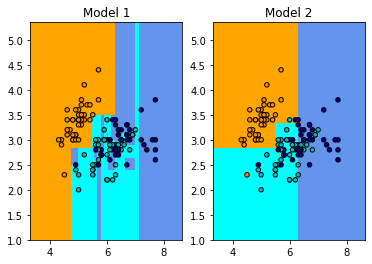

In [ ]:
# your code
from sklearn import tree
from sklearn.model_selection import train_test_split

#1) split the data two fold 20 and 80 paramater = 1
# df[["x", "y"]].values df["label"].values (for labels)
X = df.drop('label', axis=1) 
y = df['label']              
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.20)
# Create model
fig, axs = plt.subplots(1,2)
titles = ["Model 1","Model 2"]
model1 = tree.DecisionTreeClassifier(min_samples_leaf = 1) #Create decision tree classifier object
model2 = tree.DecisionTreeClassifier(max_depth = 4,min_samples_leaf = 5) #Create another decision tree classifier object

visualize_model(model1,X_train.values,y_train.values,axs[0],titles[0])
visualize_model(model2,X_train.values,y_train.values,axs[1],titles[1])



<font color="blue">[Double Click to Insert Your Comments]</font>


In Model 1, whole left bottom corner is orange because of only one orange dot.  However in model 2 i see a better and more stable distrubition, little dots does not effect the overall color that much. 

### Q2: Model Performance

In the previous task, you performed a visual inspection on the decision tree models. Here, you are going to compare the performance with respect to the test data. And then solidify your findings with cross validation.

1. For both of the models, find the accuracy score on the train data. 
  - Here, the models are already trained with the train data. Measure the performance of the models on the train data.

2. For both of the models, find the accuracy score on the test data.

Once you extract the accuracy values, display the model performances' in a bar chart. An exemplary figure can be found below. 

<img height="300" widht="300" src="https://i.ibb.co/gjDm65z/gg.png"/>

Compare the models in terms of their performance on train and test data. Discuss the difference between the results. And try to explain the reason behind the difference.

Model 1 : Decision Tree Accuracy on test data:0.7333333333333333
Model 1 : Decision Tree Accuracy on train data:0.9416666666666667
Model 2 : Decision Tree Accuracy on test data:0.8333333333333334
Model 2 : Decision Tree Accuracy on train data:0.7916666666666666


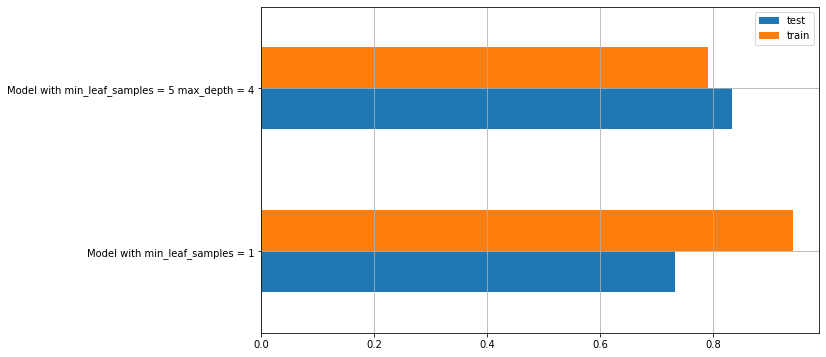

In [ ]:
  # your code
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
import pandas
import matplotlib.pyplot as plt
import numpy as np
#***** Start: 1. accuracy score on train data*****
dt_model1_train = model1.predict(X_train)
dt_model2_train = model2.predict(X_train)
dt_model1_acc_train = accuracy_score(y_train, dt_model1_train)
dt_model2_acc_train = accuracy_score(y_train, dt_model2_train)
#*****  End: 1. accuracy score on train data******

#***** Start: 2. accuracy score on test data*****
dt_model1_test = model1.predict(X_test)
dt_model2_test = model2.predict(X_test)
dt_model1_acc_test = accuracy_score(y_test, dt_model1_test)
dt_model2_acc_test = accuracy_score(y_test, dt_model2_test)
#*****  End: 2. accuracy score on test data******

test = [dt_model1_acc_test, dt_model2_acc_test]
train = [dt_model1_acc_train, dt_model2_acc_train]
index = ['Model with min_leaf_samples = 1', 'Model with min_leaf_samples = 5 max_depth = 4']
df_plot = pd.DataFrame({'test': test,'train': train}, index=index)
ax = df_plot.plot.barh(grid = True, figsize=(10, 6))
print("Model 1 : Decision Tree Accuracy on test data:" +str(dt_model1_acc_test))
print("Model 1 : Decision Tree Accuracy on train data:" +str(dt_model1_acc_train))
print("Model 2 : Decision Tree Accuracy on test data:" +str(dt_model2_acc_test))
print("Model 2 : Decision Tree Accuracy on train data:" +str(dt_model2_acc_train))


<font color="blue">[Double Click to Insert Your Comments]</font>


Model 1 which has 1 leaf sample has higher accuracy in train case. In this model (model 1, min_leaf_sample = 1) test accuracy is lower which is a not a good thing because we trained on trained data. In model 2, which has max_depth = 4 it is better than model 1 in test case which is a good thing. but it has lower accuracy score on train case. However this results highly depend on the random splitting procedure, in order to get more reliable results we can use cross validation.



### Q3: Cross Validation

Train-test splitting based model evaluations highly depend on the random splitting procedure. In order to evaluate your models in a more robust manner, you may apply cross validation.

Here, apply 10-Fold cross validation for both of the models and discuss the results.

1. Generate both of the models with the same set of hyperparameter settings.

2. Evalute your models with 10-Fold cross validation.

  - Here, you should be working with the original data. There is no need for the train/test folds.

Once you obtain the cross validation accuracy values, discuss the results. Which model is better and why? 

In [ ]:
# your code
from sklearn.model_selection import cross_val_score

# 1) Generate both of the models with same set of hyparameter settings,
model1 = tree.DecisionTreeClassifier(min_samples_leaf = 1) 
model2 = tree.DecisionTreeClassifier(max_depth = 4,min_samples_leaf = 5) 

# X is my original data for features
# y is my original data for label
# Set cv = 10
# 2) Evaluate models with cv = 10
model1_accuracies = cross_val_score(model1, X, y, cv=10) # i am working with the original data X and y
model2_accuracies = cross_val_score(model2, X, y, cv=10)
print("Model 1 accuracies:", model1_accuracies)
print("Model 2 accuracies:", model2_accuracies)

# Validation accuracy can be estimated using the mean of the CV accuracies
# Bonus: we can calculate a standard deviation over the different folds
print("Accuracy for Model 1: %0.2f (+/- %0.2f)" % (model1_accuracies.mean(), model1_accuracies.std() * 2))
print("Accuracy for Model 2: %0.2f (+/- %0.2f)" % (model2_accuracies.mean(), model2_accuracies.std() * 2))

Model 1 accuracies: [0.53333333 0.8        0.6        0.73333333 0.66666667 0.6
 0.73333333 0.66666667 0.53333333 0.73333333]
Model 2 accuracies: [0.66666667 0.73333333 0.86666667 0.8        0.53333333 0.66666667
 0.73333333 0.73333333 0.6        0.86666667]
Accuracy for Model 1: 0.66 (+/- 0.17)
Accuracy for Model 2: 0.72 (+/- 0.20)


<font color="blue">[Double Click to Insert Your Comments]</font>

In my opinion Model 2 performs better than Model 1 because accuracy is higher when compared to Model 1 ( 0.72 vs 0.66). It performs approximately %6 better than Model 1. When we calculate the standart deviation in these two models over different folds there is not much difference between the two its just 0.03. If i had to choose one of these models in order to use i would go with Model No.2